# Escuela Politecnica Nacional
## FACULTAD INGENIERIA EN SISTEMAS INFORMATICOS
### Nombre: Ana Capa

### TEMA: Anális de página de venta de libros


## Objetivo:
### - Analizar la data obtenida mediante scraping 
### - Representar mediante gráficas

## Introducción:

### Para el presente informe se analizo la página de https://espanol.free-ebooks.net/ , de la cual se pudo extraer la información en formato csv.


## Desarrollo:

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

#### Data con la cual se analizará

In [21]:
path_dataset = "./libros.csv"
columnas = ["titulo", 
            "autor", 
            "categoria",
            "publicacion",
            "descargas",
            "paginas"]

dataframe = pd.read_csv(path_dataset,encoding='latin-1', header= None)
dataframe.columns = columnas
dataframe.head(100)

,titulo,autor,categoria,publicacion,descargas,paginas
0,La Caravana Perdida,Zane Grey,Aventura,Apr 2013,1381,171.0
1,El Caballo Salvaje,Zane Grey,Aventura,Apr 2013,1130,149.0
2,Al oeste del Pecos,Zane Grey,Aventura,Apr 2013,2685,139.0
3,El Vampiro en el Convento,Louis-Antoine De Caraccioli,Aventura,Apr 2013,302,3.0
4,El Cuchillo Fatídico,Zane Grey,Aventura,Apr 2013,776,145.0
...,...,...,...,...,...,...
95,La Buena Fama,Juan Valera,Ficción Contemporánea,Nov 2011,459,54.0
96,El caballero de la masion rouge,Alejandro Dumas,Aventura,Nov 2011,1663,342.0
97,Torquemada en la cruz,Benito Pérez Galdós,Clásicos: Novelas y Cuentos,Nov 2011,791,116.0
98,El nacimiento de un fenómeno 'Kili',José Ignacio Núñez (Chetxu),Literatura Infantil,Nov 2011,3437,192.0


#### 1. Qué tipos de libros son los más vendidos?

###### De acuerdo a la grafica los libros más vendidos son de autoayuda


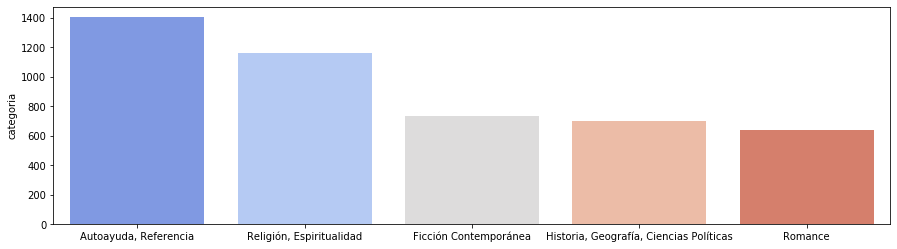

In [35]:
categoria = dataframe["categoria"].value_counts().head(5)
f,ax = plt.subplots(1,1,figsize=(15,4))
#print(categoria)
ax = sns.barplot(categoria.index, categoria,palette='coolwarm')

#### 2. Número de descargas por obra

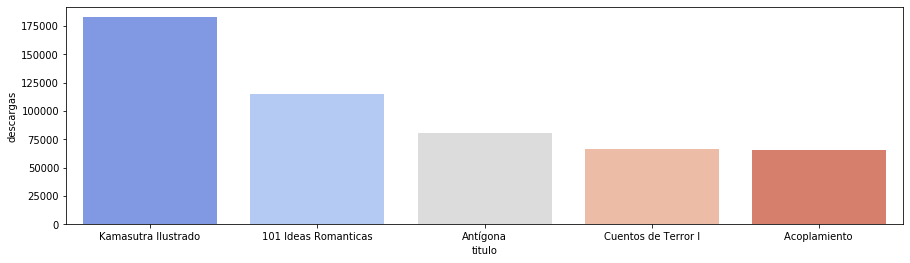

In [38]:
libros_descargados = dataframe[["titulo","descargas"]].sort_values(by=['descargas'], ascending=False).head(7)
f,ax = plt.subplots(1,1,figsize=(15,4)) 
ax = sns.barplot(libros_descargados["titulo"], libros_descargados["descargas"],palette='coolwarm')

#### 3.  Obtener el promedio de descargas por categoria

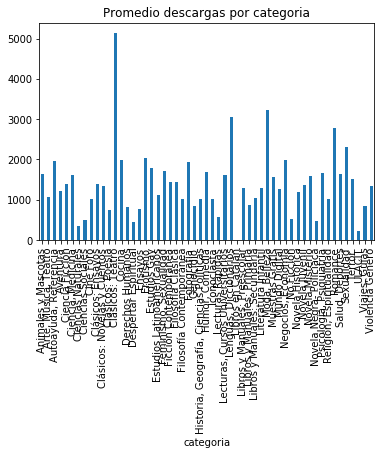

In [41]:
dataframe.groupby('categoria').mean()["descargas"].plot(kind='bar',stacked=True,
          title="Promedio descargas por categoria")

#### 4. Variedad de titulos con sus diferente autores

titulo
Seducción           10
El Secreto           8
Cuentos              8
Sueños               7
Medicina Natural     6
Name: autor, dtype: int64


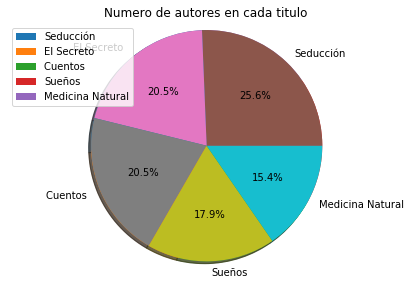

In [45]:
titulos = dataframe.groupby("titulo")["autor"].size().sort_values(ascending=False).head(5)
print(titulos)
patches,texts=plt.pie(titulos,shadow=True,startangle=90)
plt.pie(titulos,shadow=True,labels=titulos.index,autopct='%1.1f%%')
plt.legend(patches,titulos.index,loc="best")
plt.axis("equal")
plt.title("Numero de autores en cada titulo")
plt.tight_layout()
plt.show()

#### 5. Variedad de autores por tipo o categoria de libros

categoria
Autoayuda, Referencia                      1403
Religión, Espiritualidad                   1162
Ficción Contemporánea                       734
Historia, Geografía, Ciencias Políticas     700
Romance                                     641
Name: autor, dtype: int64


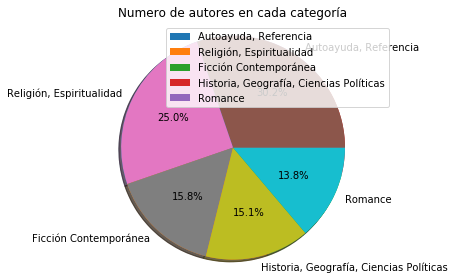

In [46]:
autores = dataframe.groupby("categoria")["autor"].size().sort_values(ascending=False).head(5)
print(autores)
patches,texts=plt.pie(autores,shadow=True,startangle=90)
plt.pie(autores,shadow=True,labels=autores.index,autopct='%1.1f%%')
plt.legend(patches,autores.index,loc="best")
plt.axis("equal")
plt.title("Numero de autores en cada categoría")
plt.tight_layout()
plt.show()

#### 6. Obras por autor

Text(0.5, 0, 'Autor')

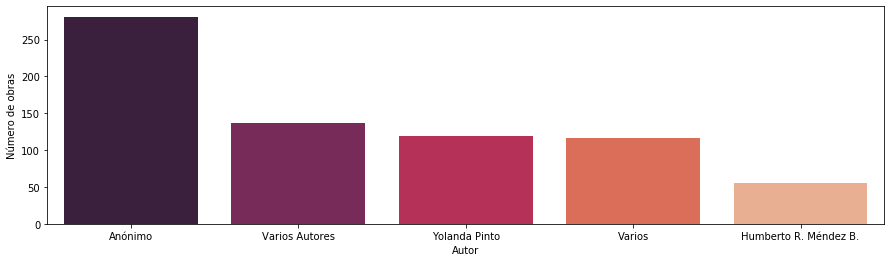

In [50]:
libros_autor = dataframe.groupby("autor")["titulo"].size().sort_values(ascending=False).head(5)
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(libros_autor.index, libros_autor, palette="rocket")
#ax = sns.barplot(x='autor', y='titulo',  data=libros_autor)
ax.set_ylabel("Número de obras")
ax.set_xlabel("Autor")

#### 7. Promedio de Descargas por categoria

categoria
Clásicos: Teatro         5139.098361
Moda, Belleza            3221.870968
Lenguas, Diccionarios    3043.857143
Romance                  2777.048362
Sexualidad               2297.363208
Name: descargas, dtype: float64


Text(0, 0.5, 'Descargas')

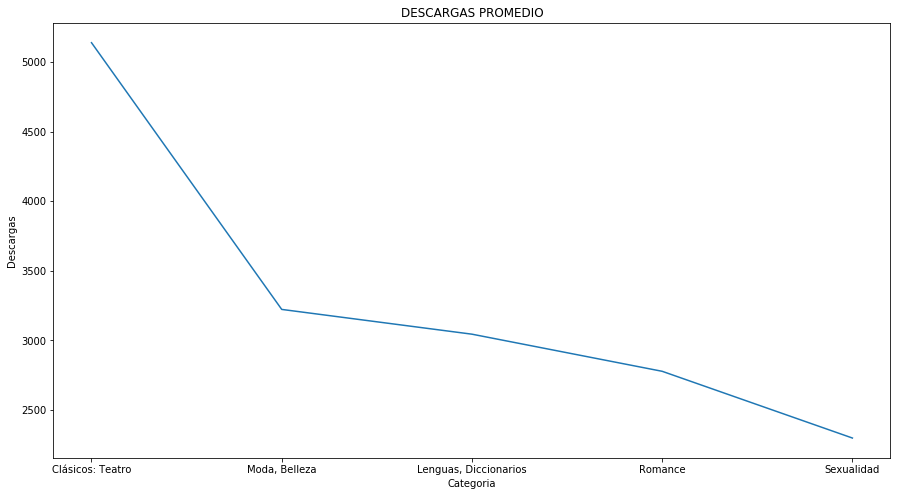

In [52]:
descargas_categoria = dataframe.groupby("categoria")["descargas"].mean().sort_values(ascending=False).head(5)
print(descargas_categoria)
figura_mes = plt.figure(figsize=(15,8))
ax = figura_mes.add_subplot(1, 1, 1)
ax.plot(descargas_categoria)
ax.set_title('DESCARGAS PROMEDIO')
ax.set_xlabel('Categoria')
ax.set_ylabel('Descargas')

#### 8. Porcentaje de autores que tiene libros publicados en lapágina

Text(0, 0.5, '')

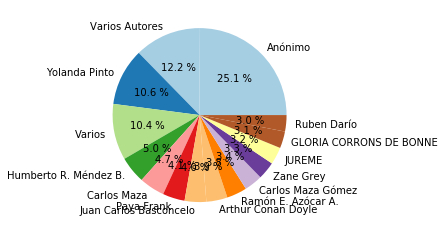

In [56]:
dataframe['autor'].value_counts().head(15).plot(kind = 'pie', cmap = 'Paired', autopct="%0.1f %% ")
plt.ylabel('')

##### 10. Porcentaje de categorias en la página

Text(0, 0.5, '')

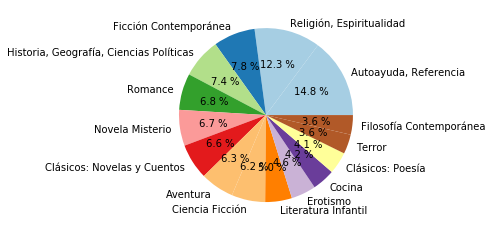

In [57]:
dataframe['categoria'].value_counts().head(15).plot(kind = 'pie', cmap = 'Paired', autopct="%0.1f %% ")
plt.ylabel('')

#### 11.Promedio autores por descarga

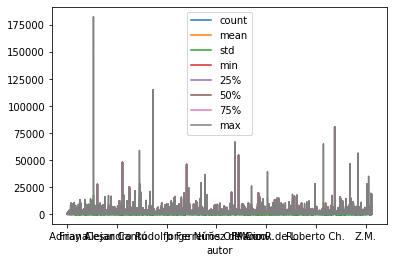

In [59]:
promedio = dataframe.groupby(['autor'])['descargas'].describe()
promedio.plot(kind='line')

#### 12. Porcentaje de libros que se encuentran poraño de publicación

Text(0, 0.5, '')

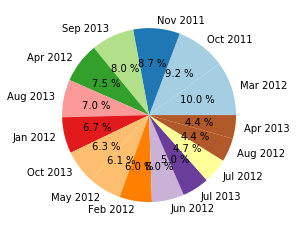

In [60]:
dataframe['publicacion'].value_counts().head(15).plot(kind = 'pie', cmap = 'Paired', autopct="%0.1f %% ")
plt.ylabel('')

#### 13. Paginas por Libro

categoria
Despertar Espiritual     305.185185
Lenguas, Diccionarios    286.539683
Clásicos: Ensayos        252.714286
Novela Histórica         249.523810
Ciencias Naturales       177.500000
Name: paginas, dtype: float64


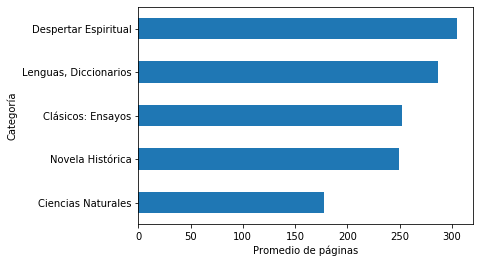

In [61]:
paginas_categoria = dataframe.groupby("categoria")["paginas"].mean().sort_values(ascending=False).head(5)
print(paginas_categoria)
ax = paginas_categoria.plot(kind="barh")
plt.xlabel('Promedio de páginas'); 
plt.ylabel('Categoría'); 
ax.invert_yaxis()

#### 14. Promedio de paginas escritas por diferentes autores

autor
Aristide van Aartsengel    5688.0
Williams                   3196.0
David Canga Corozo         2777.0
Valenti                    2631.0
Universität München        2567.0
Name: paginas, dtype: float64


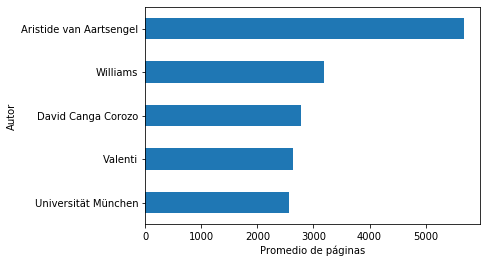

In [62]:
paginas_categoria = dataframe.groupby("autor")["paginas"].mean().sort_values(ascending=False).head(5)
print(paginas_categoria)
ax = paginas_categoria.plot(kind="barh")
plt.xlabel('Promedio de páginas'); 
plt.ylabel('Autor'); 
ax.invert_yaxis()

#### 15. Numero de publicaciones por autor

Text(0.5, 0, 'Autor')

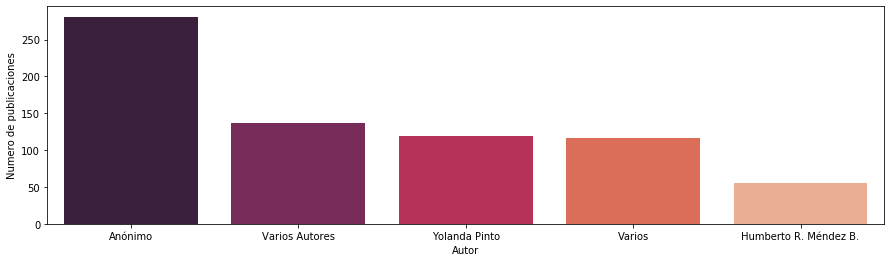

In [68]:
libros_autor = dataframe.groupby("autor")["publicacion"].size().sort_values(ascending=False).head(5)
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(libros_autor.index, libros_autor, palette="rocket")
ax.set_ylabel("Numero de publicaciones")
ax.set_xlabel("Autor")

#### 17. Año en el cual se publicaron mayor cantidad delibros

Mar 2012    598
Oct 2011    550
Nov 2011    517
Sep 2013    476
Apr 2012    445
Name: publicacion, dtype: int64


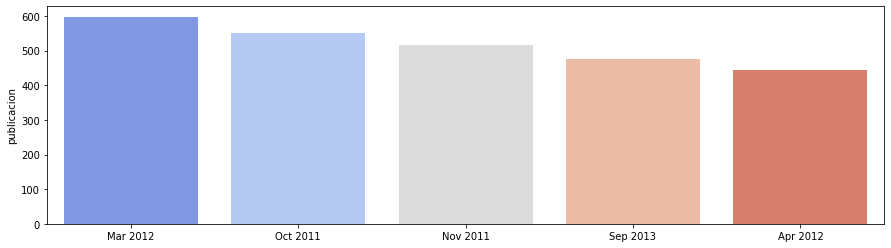

In [71]:
anio =  dataframe["publicacion"].value_counts().head(5)
f,ax = plt.subplots(1,1,figsize=(15,4))
print(anio)
ax = sns.barplot(anio.index, anio,palette='coolwarm')

##### 18. Histograma de descargas

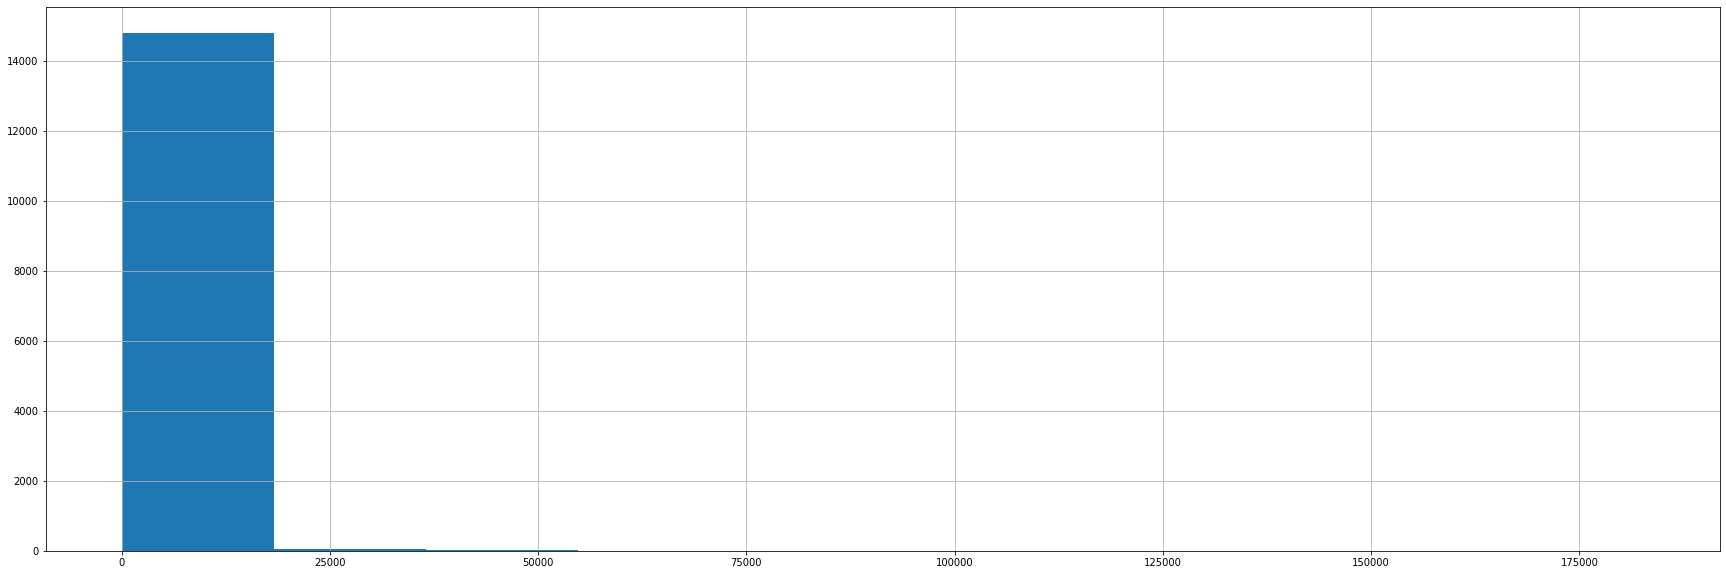

In [78]:
fig = plt.figure(figsize=(30,10))


#df_completo_pickle.visitas[df_completo_pickle.Titulo== "Boys Before Flowers"].value_counts(normalize = True).plot(kind='bar',alpha=0.5)
dataframe['descargas'].hist()

#### 18. Histograma por numero de páginas

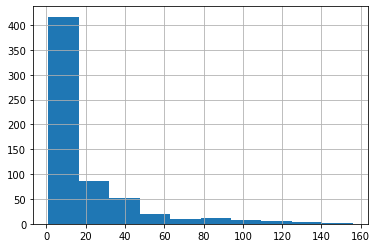

In [79]:
dataframe['paginas'].value_counts().hist()

#### 19. Autores con menos libros descargados

In [104]:
autor_descargas = dataframe['autor'].value_counts().reset_index()
autor_descargas.columns = ['autor', 'descargas']
autor_descargas= autor_descargas[-20:]
autor_descargas

,autor,descargas
6102,W.R.Daros,1
6103,Emilio Antunez,1
6104,Rabí HayIm Halew Donin,1
6105,Rodrigo Fernando Flores,1
6106,César Henrríquez Juárez,1
6107,Bruce Lee,1
6108,Josef Carel,1
6109,Jean Hyppolite,1
6110,Ana Bella,1
6111,www.ministerioluzalasnaciones.com,1


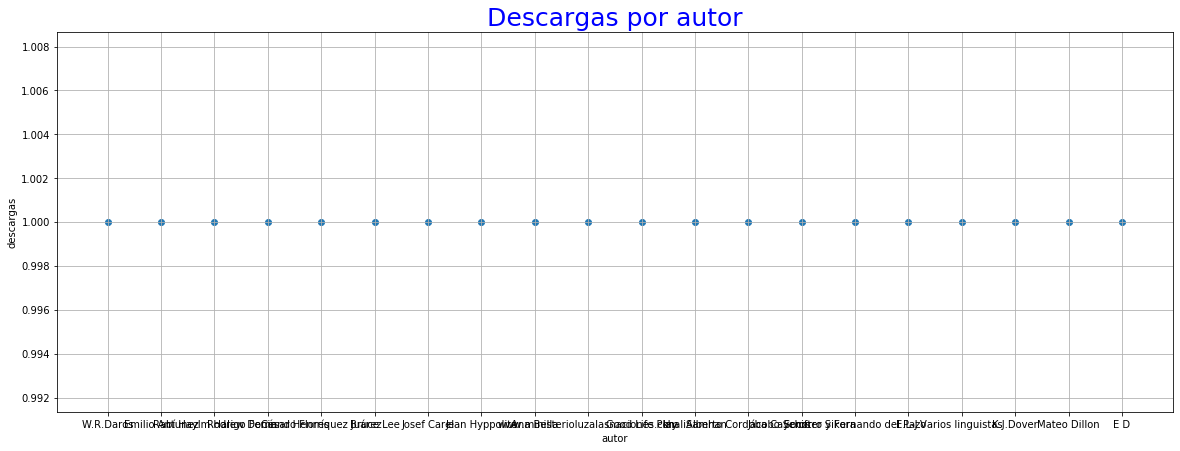

In [105]:
plt.figure(figsize=(20,7))
plt.grid(True)
plt.scatter(autor_descargas['autor'], autor_descargas['descargas'])
plt.xlabel('autor')
plt.ylabel('descargas')
plt.title('Descargas por autor', color='b', size = 25)
plt.show()

##### 20. 10 libros con menos descargas

In [109]:
publicacion_descargas = dataframe['publicacion'].value_counts().reset_index()
publicacion_descargas.columns = ['publicacion', 'descargas']
publicacion_descargas= publicacion_descargas[-20:]
publicacion_descargas

,publicacion,descargas
87,Aug 2017,53
88,Oct 2015,52
89,Jul 2011,51
90,Jun 2019,50
91,May 2019,45
92,Sep 2018,42
93,Dec 2018,41
94,Nov 2015,40
95,Aug 2015,38
96,Jul 2017,38


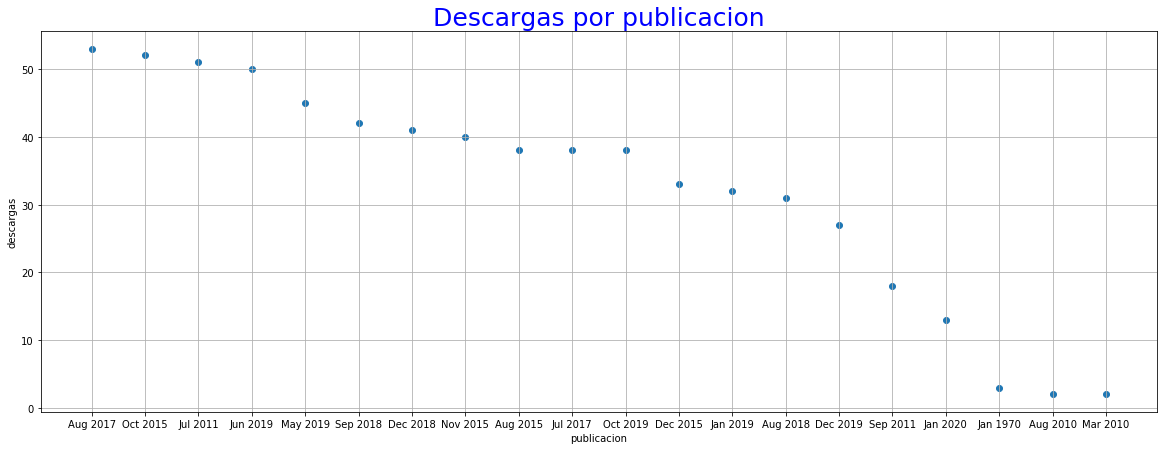

In [110]:
plt.figure(figsize=(20,7))
plt.grid(True)
plt.scatter(publicacion_descargas['publicacion'], publicacion_descargas['descargas'])
plt.xlabel('publicacion')
plt.ylabel('descargas')
plt.title('Descargas por publicacion', color='b', size = 25)
plt.show()